<a href="https://colab.research.google.com/github/harishkollana/Airbnb-Capstone-Project/blob/main/Airbnb_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

**Load .csv files**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating a dataframe for the given data
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Data Exploration**

**Let’s see Data through Data Frame**

In [ ]:
#just checking how the data is
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Dataset Information**

In [ ]:
#knowing the volume of data
df.shape

(48895, 16)

In [ ]:
#checking the information about column wise no of non null records & type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Unique values For Variable Identification**

In [ ]:
#checking unique values for all columns(imp for knowing the categorical and numerical variables)
df.describe(include='all').loc['unique', :]


id                                  NaN
name                              47905
host_id                             NaN
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                            NaN
longitude                           NaN
room_type                             3
price                               NaN
minimum_nights                      NaN
number_of_reviews                   NaN
last_review                        1764
reviews_per_month                   NaN
calculated_host_listings_count      NaN
availability_365                    NaN
Name: unique, dtype: object

From the above we get to know that the name,host_name,neighbourhood_group,neighbourhood,room_tyoe and last review per month seems as categorical variables. But the thing is out of 48895 records name has 47905 unique almost same and last_review is date column. so we are not considering these as categorical variables for the proof we are checking with duplicate values below.

**Checking Duplicated Data**

In [ ]:
#finding duplicate values of name variable
df.duplicated(subset=['name']).sum()

989

In [ ]:
#duplicate records containing same name
df.loc[df.duplicated(subset=['name']), :].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84


In [ ]:
#duplicate records containing same name of Loft w/ Terrace @ Box House Hotel
df.loc[df['name']=='Loft w/ Terrace @ Box House Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


From the above observation we came to know that all these are not duplicate but unique beacause they are having same name but different pricing in listings

In [ ]:
#finding duplicate values of last_review variable
df.duplicated(subset=['last_review']).sum()

47130

In [ ]:
#duplicate records containing same dates of last reviews
df.loc[df.duplicated(subset=['last_review']), :].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249


In [ ]:
#duplicate records containing same dates of last reviews on 2019-06-22
df.loc[df['last_review']=='2019-06-22'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
37,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1.96,2,22
55,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,2019-06-22,0.90,1,30


From the above observation we came to know that all these are not duplicate but unique beacause they are having same date but different listing in different locations

In [ ]:
df.loc[df['host_name']=='Natasha']

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2104,Large bedroom/Heart of Brooklyn,1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.66167,-73.95098,Private room,49,5,114,1,3,323
2765,Private fits 3 ppl. Prospect Park,1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.65936,-73.95139,Private room,49,5,84,1,3,296
3037,"Private, Cozy Bedroom/ Barclay Ctr",1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.65987,-73.95076,Private room,44,5,79,1,3,251
4550,Family-friendly 3-bedroom condo,16067583,Natasha,Brooklyn,Prospect Heights,40.67765,-73.96378,Entire home/apt,275,4,19,0,1,34
4702,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,1,1,219
4853,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,1,2,211
5341,SUNNY ROOM FOR TWO @ ELEGANT HOME NEAR JFK,19866189,Natasha,Queens,Arverne,40.58835,-73.79565,Private room,149,1,91,1,5,358
6126,Stunning room. 15mins to Manhattan!,1633246,Natasha,Brooklyn,Bedford-Stuyvesant,40.68622,-73.92508,Private room,100,30,2,0,4,7
6350,"Spacious, rustic barn style bedroom",23991556,Natasha,Bronx,Concourse,40.83719,-73.92015,Private room,85,1,9,0,1,342
6882,Lovely room!- 15 min to Manhattan!!,1633246,Natasha,Brooklyn,Bedford-Stuyvesant,40.68679,-73.92327,Private room,65,2,9,0,4,280


Host id and host names are linked and as from the above data one host has many host ids with respect to change in neighbourhood groups and neighbourhood and listing names

**Checking Null Values**

In [ ]:
#checking null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing Values Treatment**

In [ ]:
df['name'].fillna('unknown',inplace=True) #filling nan with unknown as we dont know the name
df['host_name'].fillna('no_name',inplace=True) #filling nan with no_name as we dont know the hostname
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')#filling nan with 0 and as type integer beacause it is quantitative
df.drop(['id','last_review'],axis=1,inplace=True) #last review it is unnecessary we can drop the column


the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

**Checking For any null values remaining**

In [ ]:
#checking for null and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  int64  
 12  calculated_host_listings_count  

**Data Description Of Numeric Variables**

In [ ]:
#getting to know the description of data.( most of time we can get to know about ouliners here by min,max and quartiles). price seems to have outlines as min 0 i.e free and max 10,000 but median is 106
df.describe().round(2)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,0.81,7.14,112.78
std,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.50,32.95,131.62
min,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.00,1.00,0.00
50%,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.00,1.00,45.00
75%,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.00,2.00,227.00
max,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.00,327.00,365.00


From the above information we can observe that the host id is unique id and we can skip that on this features like min,max and main important point is price is having outliners by measuring range and observing inter quartile ranges

In [ ]:
len(df[df['price']==0]) #so 11 property/listings have 0 price listed.


11

**Checking for duplicated data**

In [ ]:
duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


**Most no of listings in NYC**

In [ ]:
listings_count=df.name.value_counts()
listings_count

Hillside Hotel                                      18
Home away from home                                 17
New york Multi-unit building                        16
Brooklyn Apartment                                  12
Private Room                                        11
                                                    ..
A very spacious Zen place to vacay.                  1
One Room in Large Sunny 2 Bedroom In Brooklyn        1
Rosedale                                             1
Private Double Room in the heart of Williamsburg     1
Comfortable Private Room & Bathroom En-suite         1
Name: name, Length: 47905, dtype: int64

In [ ]:
#top 5 listings on Airbnb in entire NYC:
top_5_listings=listings_count[:5].reset_index()
top_5_listings.rename(columns= {'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
top_5_listings

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

**Most no of listings by Host**

In [ ]:
top_10_hosts=df['host_name'].value_counts()[:10]#top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

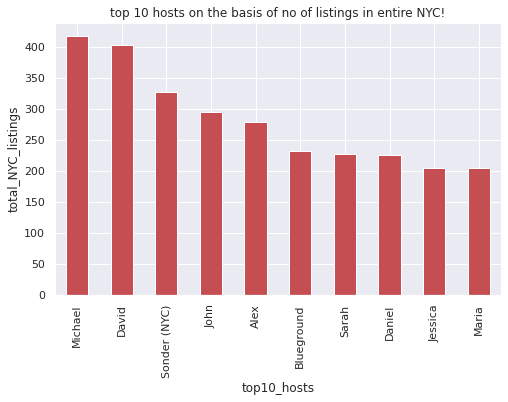

In [285]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

**Most no of listings by Neighbourhood Group**

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

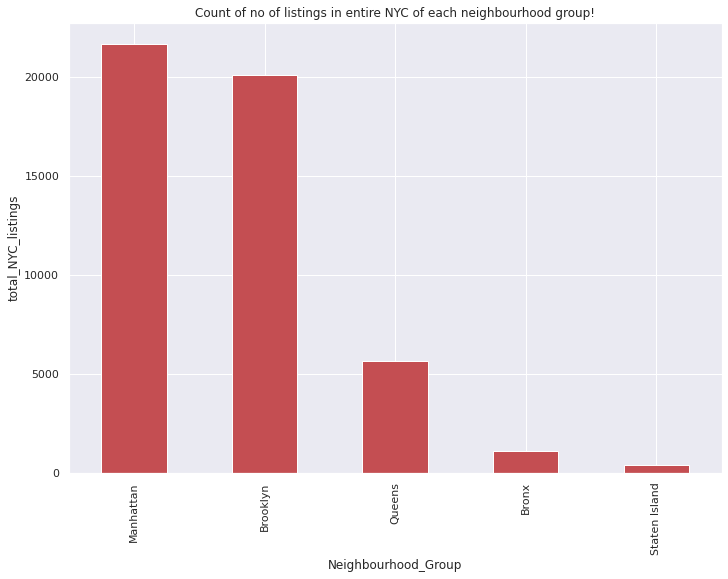

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df.neighbourhood_group.value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

**Most no of listings by Neighbourhood**

In [ ]:
df.neighbourhood.nunique()

221

In [ ]:
df.neighbourhood.unique()#looking at the unique neighbourhoods 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood!')

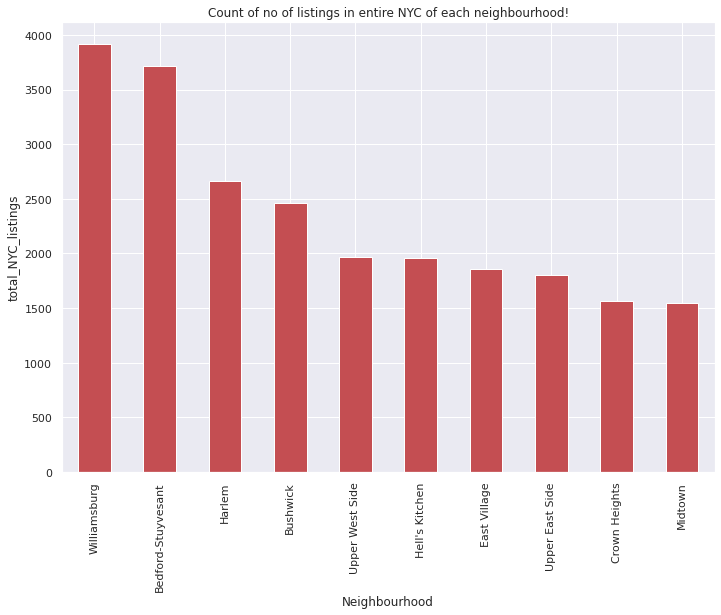

In [ ]:
#the neighbourhood 'Williamsburg' has the highest no of listings in entire NYC! 
df.neighbourhood.value_counts()[:10].plot(kind='bar',color='r')
plt.xlabel('Neighbourhood')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood!')

**No of listings in Neighbourhood Group by Room types**

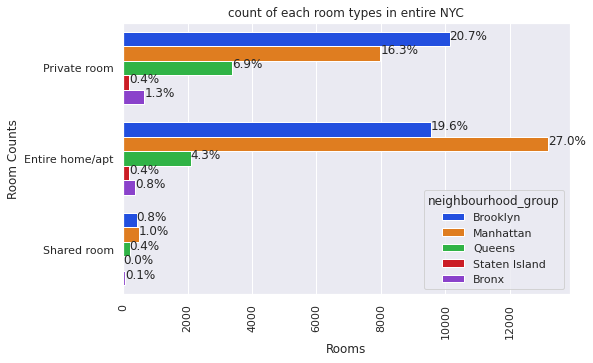

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()


Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# **Data Analysis**

**Univariate Analysis**

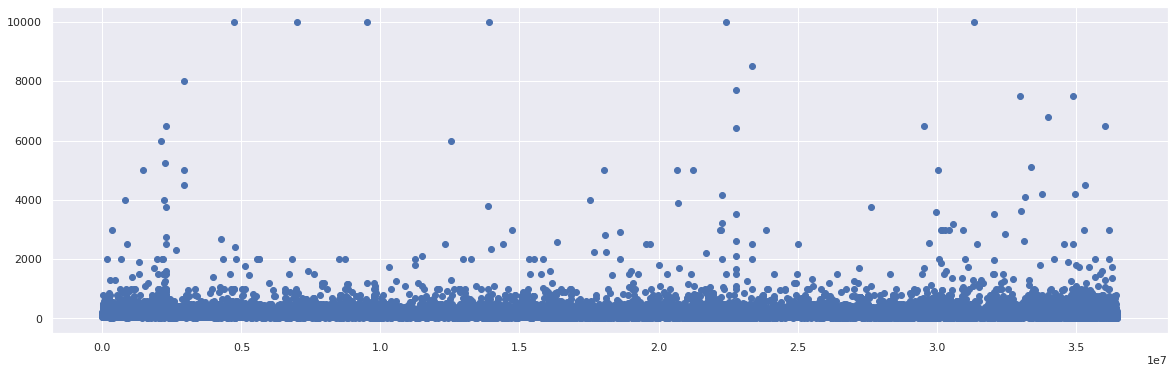

In [333]:
plt.scatter(df["id"],df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


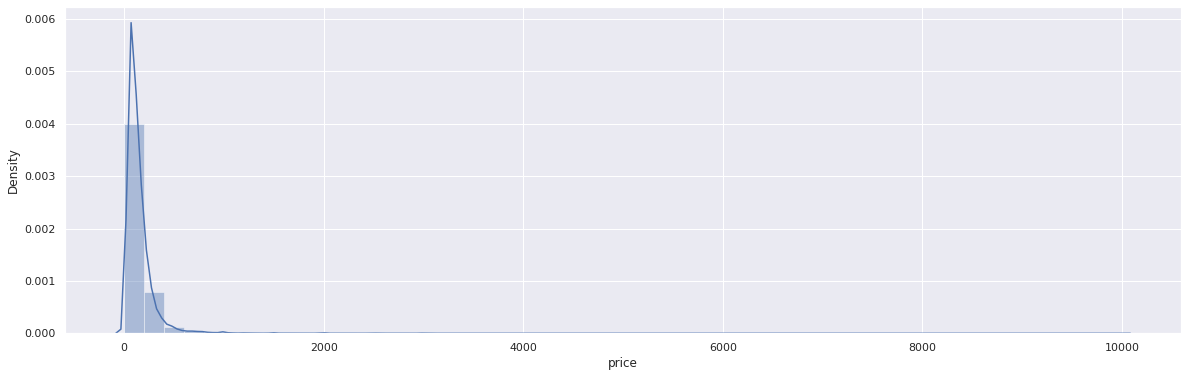

In [324]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df["price"])

The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


It looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.

Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution

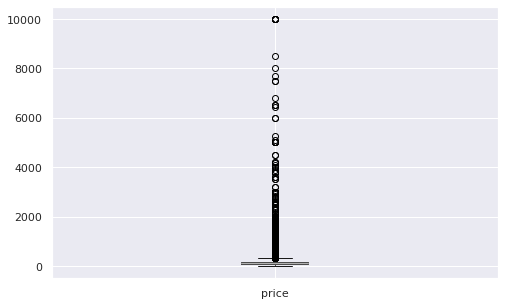

In [292]:
df.boxplot('price')
#we can see the presence of many outliers in price. Definitely we'll remove those.

**Bi-Variate Analysis**

In [ ]:
df.skew()

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.130189
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

**Numeric to Numeric For highly Skewed variables to identify outliners**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


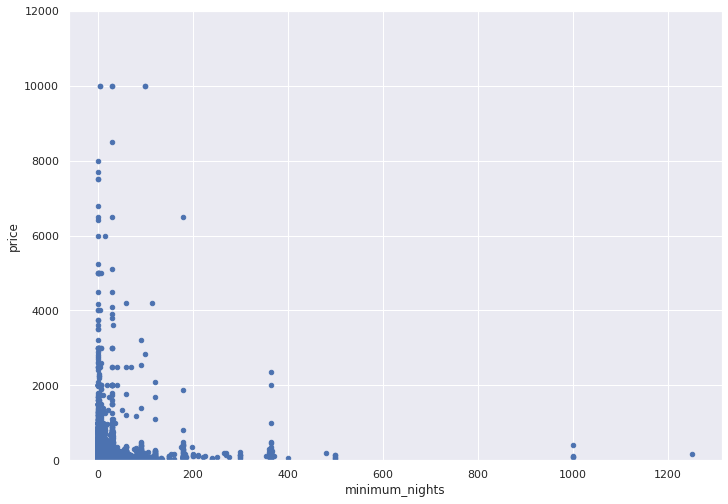

In [ ]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([df['price'],df[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.

there are many outliers as well.

**Multi-Variate Analysis**

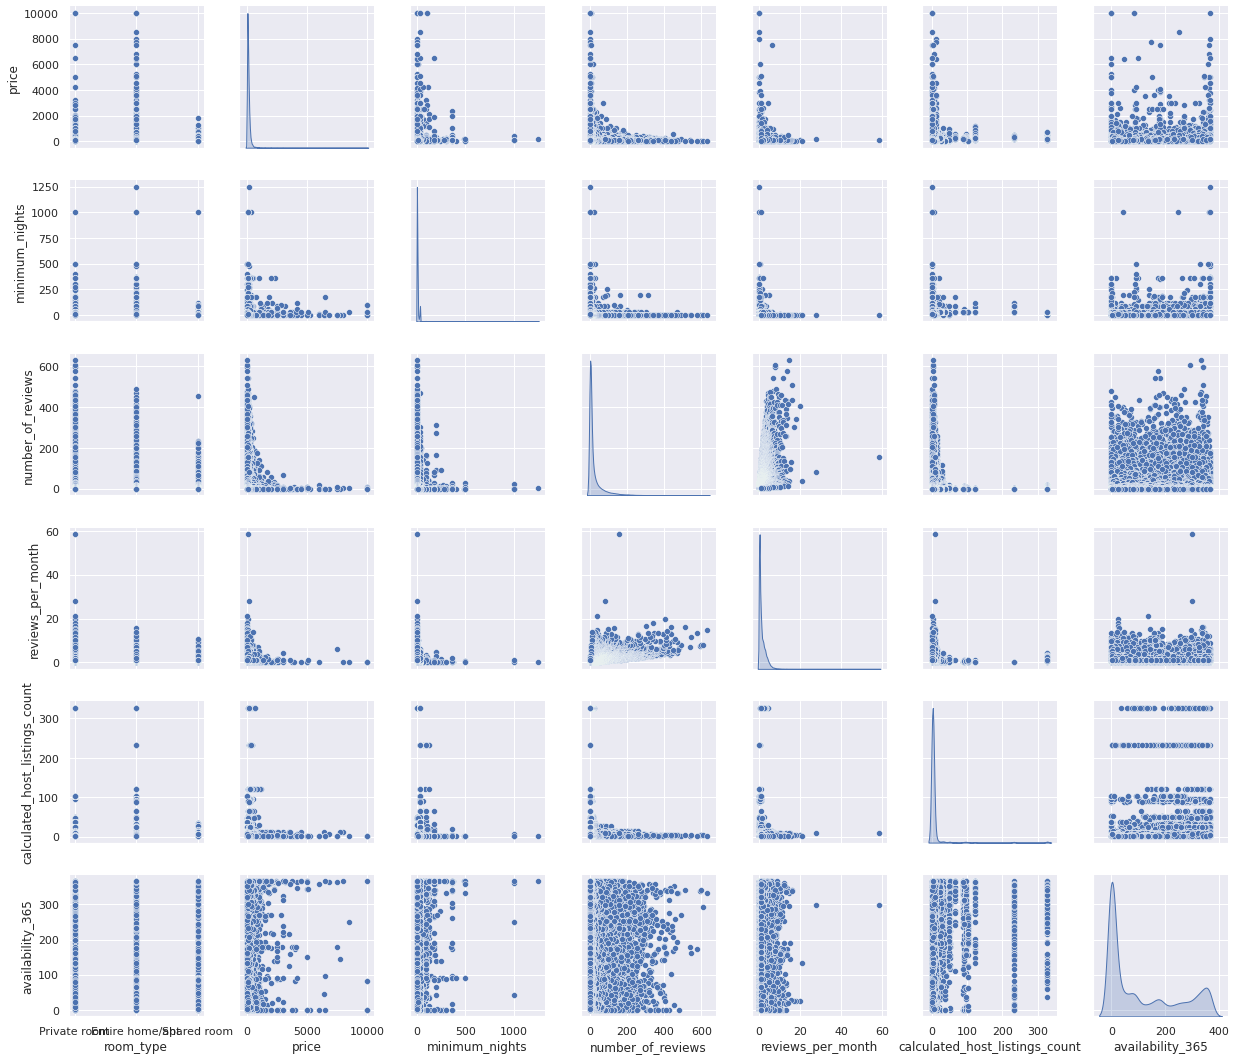

In [ ]:
sns.pairplot(
    df,
    x_vars=["room_type","price", "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"],
    y_vars=["price", "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"],diag_kind='kde'
)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

 If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails). If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).

In [ ]:
df.skew()

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.130189
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

In [ ]:
df.kurtosis()

id                                 -1.227748
host_id                             0.169106
latitude                            0.148845
longitude                           5.021646
price                             585.672879
minimum_nights                    854.071662
number_of_reviews                  19.529788
reviews_per_month                  42.493469
calculated_host_listings_count     67.550888
availability_365                   -0.997534
dtype: float64

Observation:

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers)

.......

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

**Correlation Matrix**

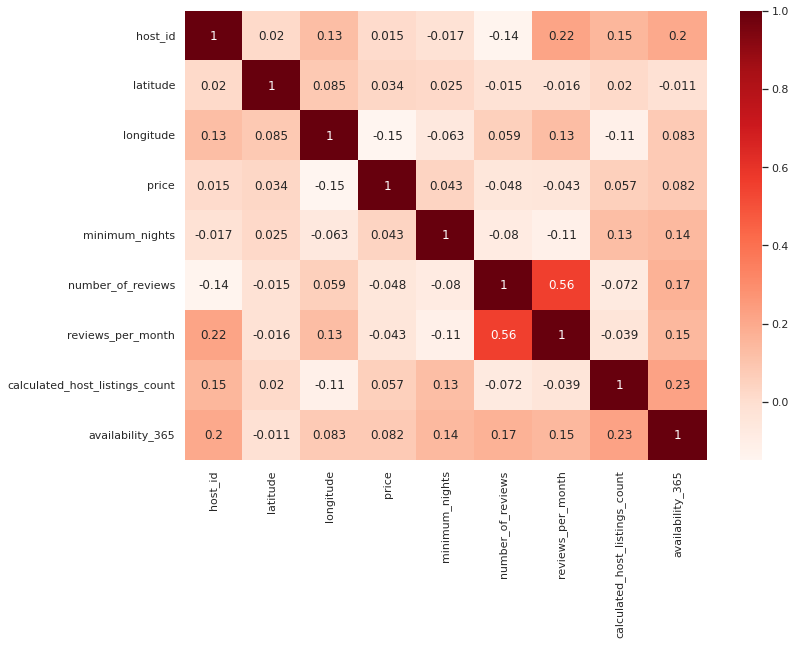

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

Observation:

There's correlation among host_id to reveiws_per_month & availability_365.

Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Handling the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


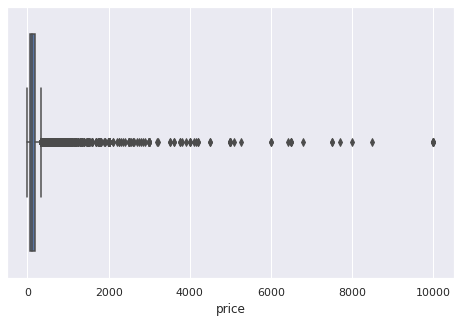

In [294]:
sns.boxplot(df['price'])


In [295]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Using quantile approach to remove outliers.**

In [296]:
min_threshold,max_threshold= df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [304]:
df[df.price<min_threshold].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258


In [298]:
len(df[df.price<min_threshold]) #prices less than min threshold!

404

In [306]:
df[df.price>max_threshold].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0


In [300]:
len(df[df.price>max_threshold])#extreme price value above max_threshold

45

In [352]:
quantile_df = df[(df.price>min_threshold)&(df.price<max_threshold)]
quantile_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


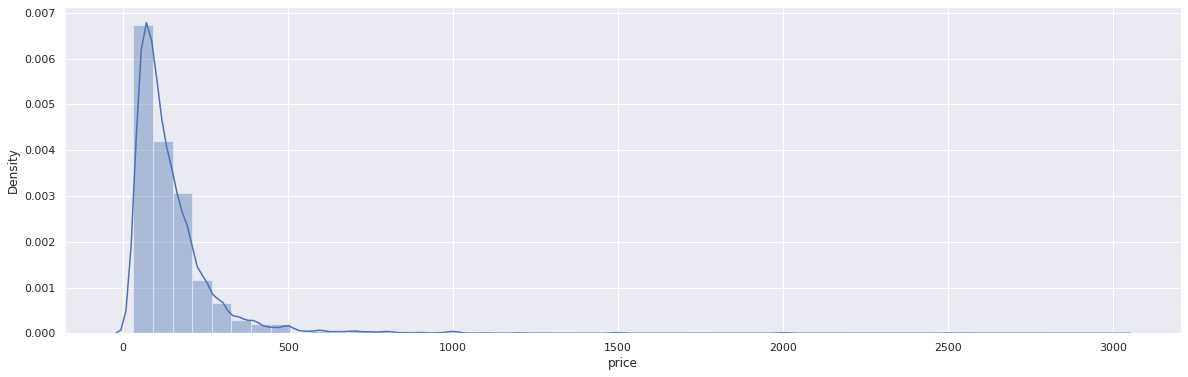

In [323]:
sns.distplot(quantile_df['price'])

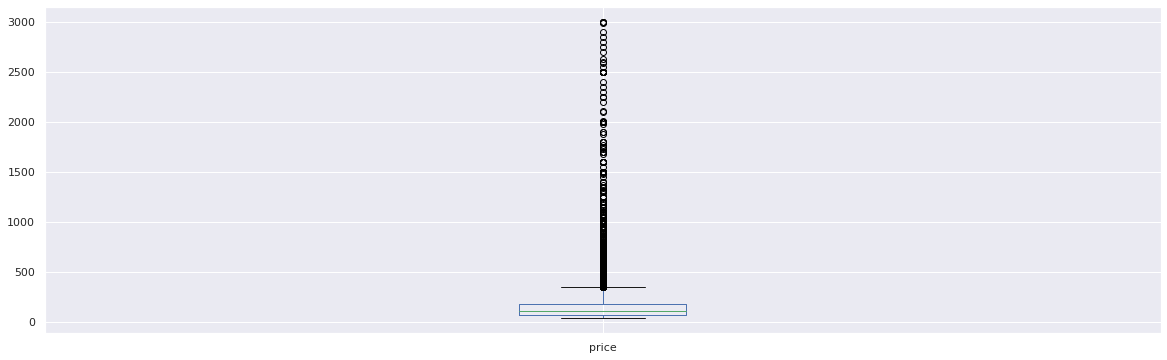

In [315]:
quantile_df.price.plot(kind='box')

In [313]:
#skewness and kurtosis
print("Skewness: %f" % quantile_df['price'].skew())
print("Kurtosis: %f" % quantile_df['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


There are still outliners and data is positively skewed. lets make outliner removal using iqr and by comparing choose the best.

**Using Inter Quartile Range approach to remove outliers.**

In [316]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [317]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [318]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [320]:
df[(df.price < lower_bound) | (df.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9


In [321]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
iqr_df = df[(df.price>lower_bound) & (df.price<upper_bound)]

In [354]:
iqr_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [355]:
iqr_df.sort_values(by=['price'],ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,20154569,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,35635299,Mel,Manhattan,Midtown,40.74353,-73.98364,Entire home/apt,333,30,66,2019-06-23,2.81,1,210
19641,15728780,"SOMMwhere in NYC/ a unique, conscious artists ...",148108,Fatima,Manhattan,Lower East Side,40.72297,-73.98946,Private room,333,1,40,2019-06-10,1.27,2,62
48567,36315904,Your Private Duplex Mansion in the HEART of NYC!,269146714,Clinton,Manhattan,West Village,40.73670,-74.00105,Entire home/apt,333,2,0,NaN,NaN,1,336
32976,26004664,Luxurious 2bed/2.5bath with Central Park Views,4876826,Alex,Manhattan,Midtown,40.76591,-73.97886,Entire home/apt,333,12,1,2018-09-24,0.10,1,110


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


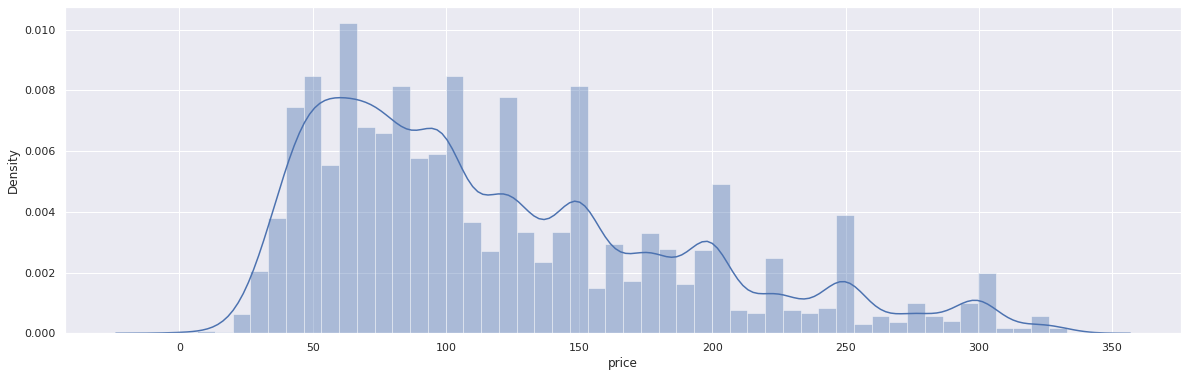

In [325]:
sns.distplot(iqr_df['price'])

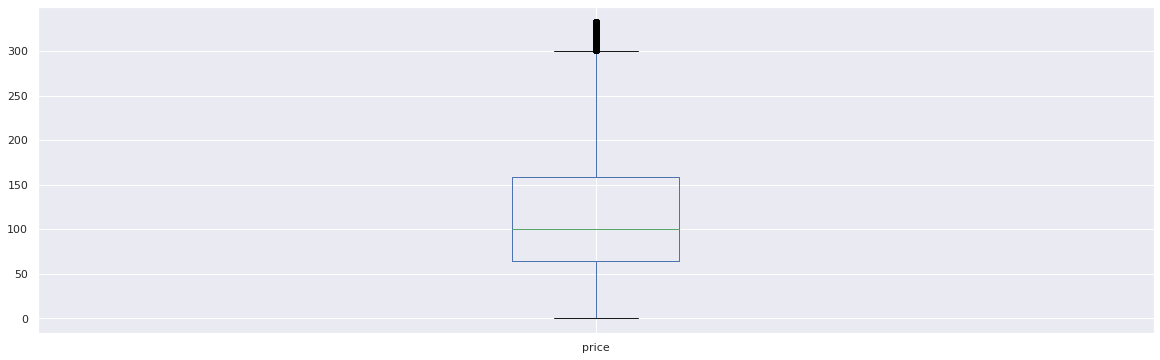

In [328]:
iqr_df.price.plot(kind='box')

In [327]:
#skewness and kurtosis
print("Skewness: %f" % iqr_df['price'].skew())
print("Kurtosis: %f" % iqr_df['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


As iqr df has less skewness and kurtosis compared to quantile. lets use this data find insights and make data visualization without price extreme values

**Bi-variate Analysis!**